## Preparation

Imported necessary packages

In [156]:
using ForwardDiff
using NBInclude
@nbinclude("Visualization.ipynb");

Defined Rosenbrock function

In [157]:
rosenbrock(x ::Array{Float64}) = sum([100*(x[i+1]-x[i]^2)^2 + (1-x[i])^2 for i in 1:(length(x)-1)])

rosenbrock (generic function with 2 methods)

Defined util functions for logging the results of optimizations

In [158]:
function log(x, y, last::Bool=false)
    n = length(y)
    for i in (last ? n : 1):n
        println("function value in iteration $i for x=$(x[:, i]) is $(y[i])")
    end
end

log (generic function with 4 methods)

In [159]:
log(xy::Tuple, last::Bool=false) = log(xy[1], xy[2], last)

log (generic function with 4 methods)

In [160]:
ITERS = 10000;
ERROR = 10e-6;

## Gradient Descent

In [161]:
rosenbrock_gradient(x ::Array{Float64}) = ForwardDiff.gradient(rosenbrock, x)

rosenbrock_gradient (generic function with 2 methods)

In [162]:
function rosenbrock_gradient_descent(x ::Array{Float64}, learningRate ::Float64, max_iters ::Int64, max_error ::Float64 = 0)
    dimensions = length(x)
    arguments = zeros(dimensions, max_iters)
    values = zeros(max_iters)
    
    for i in 1:max_iters
        gradient = rosenbrock_gradient(x)
        x -= (learningRate * gradient)
        
        arguments[1, i] = x[1]
        arguments[2, i] = x[2]
        values[i] = rosenbrock(x)
        
        if values[i] < max_error
            return (arguments[:, 1:i], values[1:i], i)
        end
    end
    return (arguments, values, max_iters)
end

rosenbrock_gradient_descent (generic function with 5 methods)

In [179]:
log(rosenbrock_gradient_descent(rand(2), 1, 5))

function value in iteration 1 for x=[-21.91147329114917, 20.402162132113954] is 2.113389928506317e7
function value in iteration 2 for x=[4.0291976454281225e6, 91962.50209345802] is 2.635568334673531e28
function value in iteration 3 for x=[-2.6164696612425213e22, 3.246886714884167e15] is 4.686653148795366e91
function value in iteration 4 for x=[7.164849978149178e69, 1.3691826976405109e47] is 2.6352899467531396e281
function value in iteration 5 for x=[-1.4712324499689732e212, 1.0267015041876854e142] is Inf


In [180]:
arg, val = rosenbrock_gradient_descent(rand(2), 0.001953125, ITERS, ERROR)
log(arg, val, true)

function value in iteration 4757 for x=[0.9968422118076677, 0.9936817350166778] is 9.987654397148931e-6


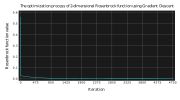

In [181]:
y = [round(v, digits=8) for v in val]
visualize_training_process(length(y), y, 
    "The optimization process of 2-dimensional Rosenbrock function using Gradient Descent", 
    "Iteration", "Rosenbrock function value")

In [166]:
ax = LinRange(0, 1.5, 100);
levels = [LinRange(0, 100, 20)...];

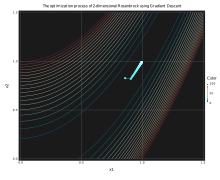

In [167]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), 
    levels, arg, 100,
    "The optimization process of 2-dimensional Rosenbrock using Gradient Descent",
    "x1", "x2",
)

## Newton

In [168]:
rosenbrock_hessian(x ::Array{Float64}) = ForwardDiff.hessian(rosenbrock, x)

rosenbrock_hessian (generic function with 2 methods)

In [195]:
function rosenbrock_newton(x ::Array{Float64}, max_iters ::Int64, max_error ::Float64 = 0)
    dimensions = length(x)
    arguments = zeros(dimensions, max_iters)
    values = zeros(max_iters)
    
    for i in 1:max_iters
        hessian = rosenbrock_hessian(x)
        hessian_inverted = inv(hessian)
        gradient = rosenbrock_gradient(x)
        x -= hessian_inverted * gradient
        
        arguments[1, i] = x[1]
        arguments[2, i] = x[2]
        values[i] = rosenbrock(x)
        
        if values[i] < max_error
            return (arguments[:, 1:i], values[1:i], i)
        end
    end
    return (arguments, values, max_iters)
end
    

rosenbrock_newton (generic function with 4 methods)

In [192]:
arg, val = rosenbrock_newton(rand(2), ITERS, ERROR)
log(arg, val)

function value in iteration 1 for x=[1.477099233859553, 0.4910792560188577] is 286.088775907173
function value in iteration 2 for x=[1.4756924780462446, 2.1776663108003476] is 0.22628333406140594
function value in iteration 3 for x=[1.000188200971135, 0.7742721198451523] is 5.112316275389915
function value in iteration 4 for x=[1.000184129195818, 1.0003682922786175] is 3.3903560752613016e-8


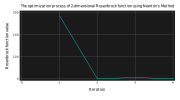

In [193]:
y = [round(v, digits=8) for v in val]
visualize_training_process(length(y), y, 
    "The optimization process of 2-dimensional Rosenbrock function using Newton's Method", 
    "Iteration", "Rosenbrock function value")

In [172]:
ax = LinRange(0, 1.5, 100);
levels = [LinRange(0, 100, 20)...];

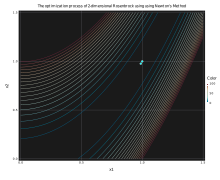

In [173]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), 
    levels, arg, 1,
    "The optimization process of 2-dimensional Rosenbrock using using Newton's Method",
    "x1", "x2",
)

## 4-dimension functions

In [174]:
log(rosenbrock_gradient_descent(zeros(4), 1, 5))

function value in iteration 1 for x=[2.0, 2.0, 0.0, 0.0] is 2403.0
function value in iteration 2 for x=[-1600.0, -1200.0, 0.0, 0.0] is 7.009447403851203e15
function value in iteration 3 for x=[1.639168001602e12, 6.93056241202e11, 0.0, 0.0] is 5.950592759290638e53
function value in iteration 4 for x=[-1.7616936705912477e39, -1.3315743716473421e38, 0.0, 0.0] is 5.373886071432001e167
function value in iteration 5 for x=[2.187012037085861e120, 9.444006446884544e116, 0.0, 0.0] is Inf


In [175]:
arg, val = rosenbrock_gradient_descent(zeros(4), 0.001, ITERS, ERROR)
log(arg, val, true)

function value in iteration 9893 for x=[0.9993129371624921, 0.9986237607279519, 0.0, 0.0] is 9.990977777189374e-6


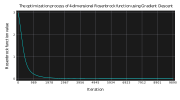

In [176]:
visualize_training_process(length(val), val, 
    "The optimization process of 4-dimensional Rosenbrock function using Gradient Descent", 
    "Iteration", "Rosenbrock function value")

In [177]:
arg, val = rosenbrock_newton(rand(4), ITERS, ERROR)
log(arg, val)

function value in iteration 1 for x=[0.6673344754572943, 0.0736692790550163, 0.0, 0.0] is 321.1001911436722
function value in iteration 2 for x=[0.5127681622869017, 0.1493055225812625, 0.0, 0.0] is 12.608346965142514
function value in iteration 3 for x=[0.46130929934938103, 0.19350257775515523, 0.0, 0.0] is 2.863650923344508
function value in iteration 4 for x=[0.6653652042307857, 0.40598384122103837, 0.0, 0.0] is 1.6456228043555288
function value in iteration 5 for x=[0.7091461437620407, 0.5012024442607429, 0.0, 0.0] is 0.9321993924482617
function value in iteration 6 for x=[0.8572963107176537, 0.7123545149765516, 0.0, 0.0] is 0.8681120657515626
function value in iteration 7 for x=[0.8541831712664351, 0.7286866752124036, 0.0, 0.0] is 0.31910853138128104
function value in iteration 8 for x=[0.957115808631061, 0.9053380595577469, 0.0, 0.0] is 0.615747107549323
function value in iteration 9 for x=[0.9489769097122455, 0.9001331219401842, 0.0, 0.0] is 0.049079795106677176
function value in

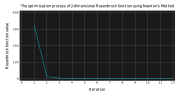

In [178]:
visualize_training_process(length(val), val, 
    "The optimization process of 2-dimensional Rosenbrock function using Newton's Method", 
    "Iteration", "Rosenbrock function value")